In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')

In [ ]:
df['category'].unique()


array([ 1, -1,  0])

In [ ]:
df['category'].value_counts()

,count
category,
1,15830
0,13142
-1,8277


In [ ]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.shape

(37249, 2)

In [ ]:
df.sample()['clean_comment'].values

array(['the famous punjabi epic love story heer ranjha was first written damodar das arora there have been many versions afterwards and the one waris shah the popular one even though wasn the first one '],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(350)

In [ ]:
df[df.duplicated]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[(df['clean_comment'].str.strip()=='')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [ ]:
df=df[~(df['clean_comment'].str.strip()=='')]

In [ ]:
#convert the clean_comment to clean_comment lower
df['clean_comment']=df['clean_comment'].str.lower()

# display the dataframe
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df[(df['clean_comment'].apply(lambda x:x.endswith(' ') or x.startswith(' ')))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# remove trailing and leading whitespace from clean_comment 'column'
df['clean_comment']=df['clean_comment'].str.strip()

# verify the transformation for checking for remaining whitespace
df['clean_comment'].apply(lambda x:x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [ ]:
# identify comment containing url
url_pattern=r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comment_with_urls=df[df['clean_comment'].str.contains(url_pattern,regex=True)]

# display the comment containg
comment_with_urls.head()

,clean_comment,category


In [ ]:
# identify comment containing new line
comment_with_newline=df[df['clean_comment'].str.contains('\n',regex=False)]

# display the comment containg
comment_with_newline

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [ ]:
# remove newline character from clean_comment column
df['clean_comment']=df['clean_comment'].str.replace('\n',' ',regex=True)

# verify the transforamtionn by checking for any remaining new lines
comment_with_newline_remaining=df[df['clean_comment'].str.contains('\n')]
comment_with_newline_remaining


,clean_comment,category


**EDA**

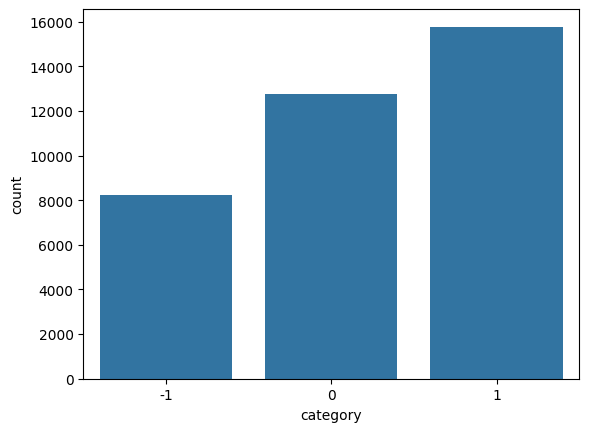

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
count_plot=sns.countplot(data=df,x='category')
plt.show()

In [ ]:
# frequency distribution of sentiments
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [ ]:
df['word_count']=df['clean_comment'].apply(lambda x:len(x.split()))

In [ ]:
df.sample(5)

,clean_comment,category,word_count
29573,barely certainly term shiv sena bajrang dal te...,1,29
7579,thank you kumbhakaran,0,3
12513,meanwhile exit poll mallu cpm channel jpg,0,7
31228,they are actually playing politics over terrorist,0,7
29488,there were whatsapp forwards saying modi depos...,1,15


In [ ]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


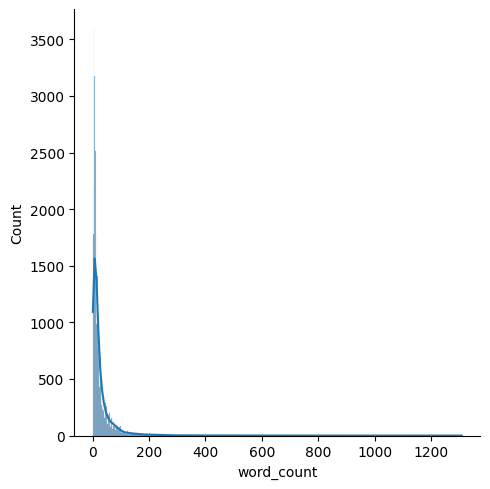

In [ ]:
sns.displot(df['word_count'],kde=True)


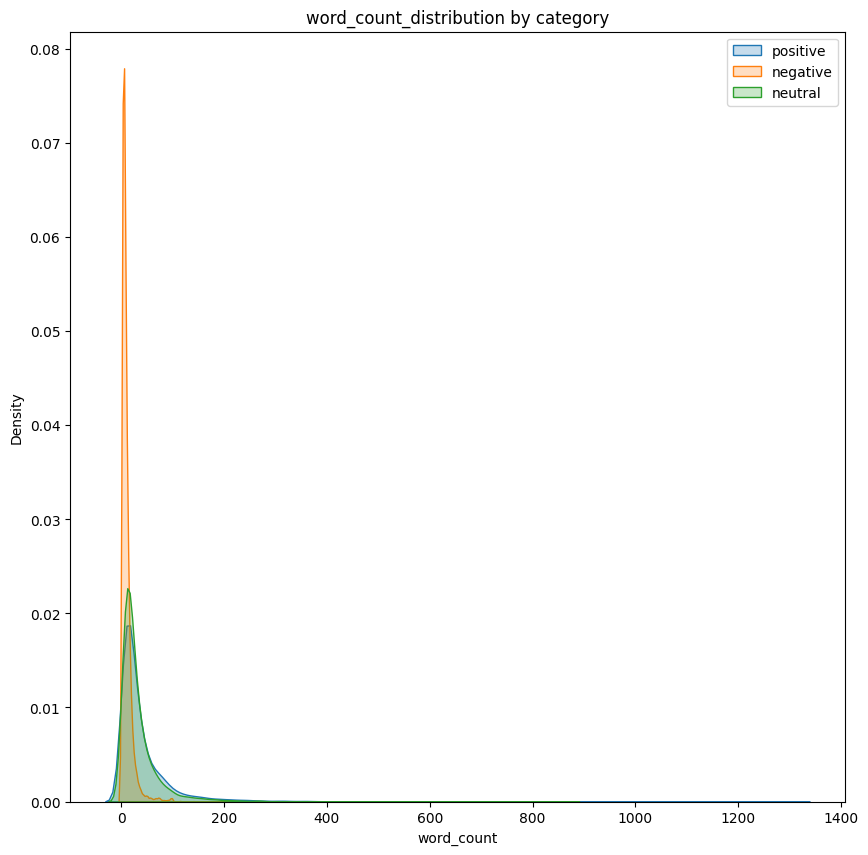

In [ ]:
#create the figure axes
plt.figure(figsize=(10,10))

#plot kde for category 1
sns.kdeplot(df[df['category']==1]['word_count'],label='positive',fill=True)

#plot kde for category -1
sns.kdeplot(df[df['category']==0]['word_count'],label='negative',fill=True)

#plot kde for category 0
sns.kdeplot(df[df['category']==-1]['word_count'],label='neutral',fill=True)

# Add title with labels
plt.title('word_count_distribution by category')
plt.xlabel('word_count')
plt.ylabel('Density')

# add legend
plt.legend()

#add show
plt.show()

<Axes: ylabel='word_count'>

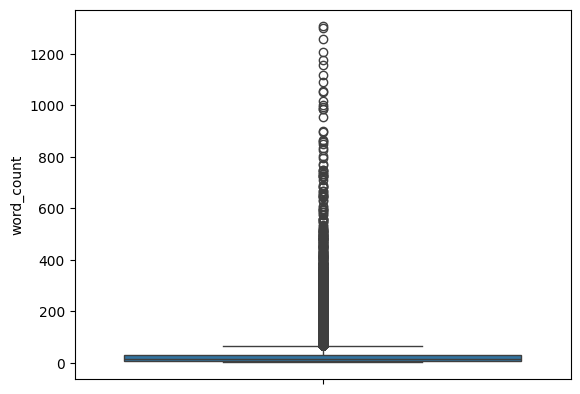

In [ ]:
sns.boxplot(df['word_count'])

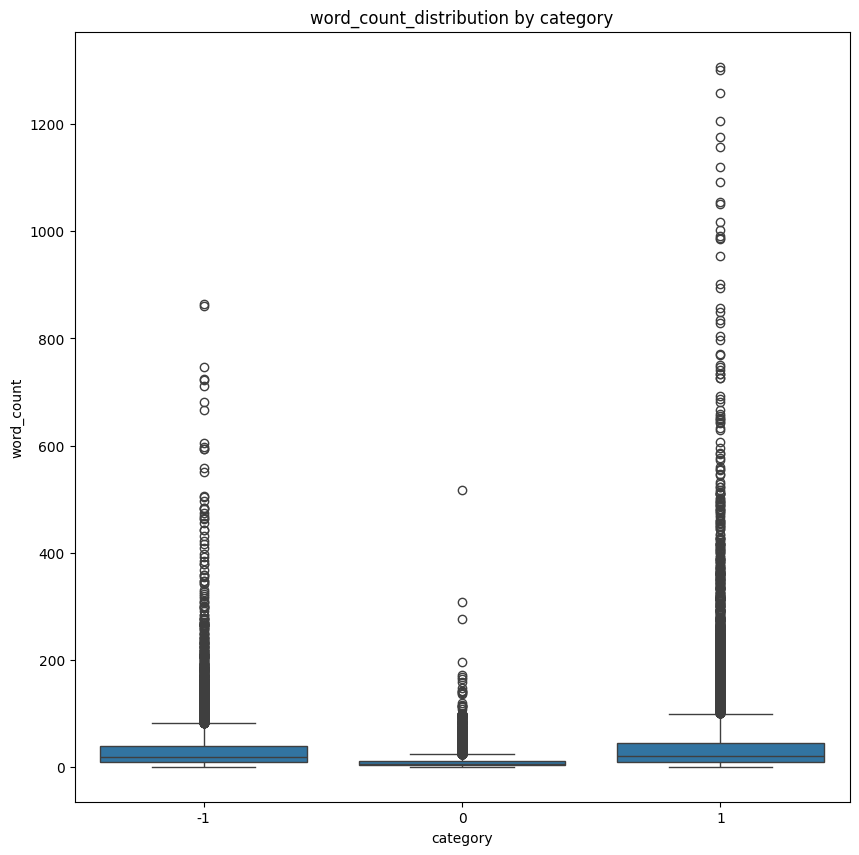

In [ ]:
# create boxplot for the 'word_count' column category by category
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='category',y='word_count')
plt.title('word_count_distribution by category')
plt.xlabel('category')
plt.ylabel('word_count')
plt.show()

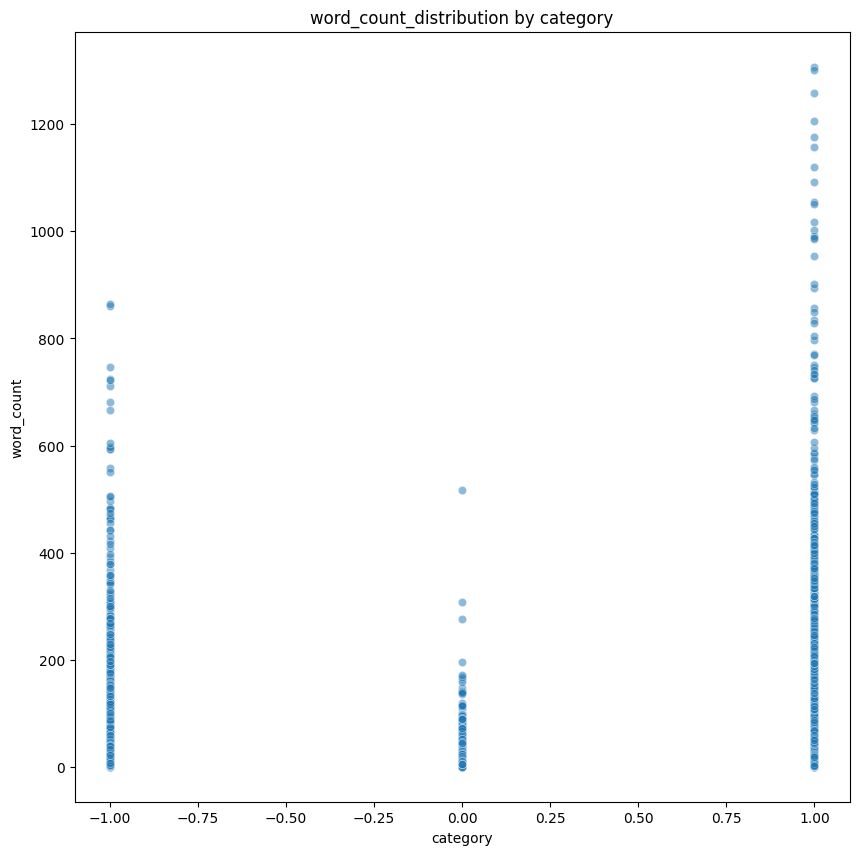

In [ ]:
# create boxplot for the 'word_count' column category by category
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='category',y='word_count',alpha=0.5)
plt.title('word_count_distribution by category')
plt.xlabel('category')
plt.ylabel('word_count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

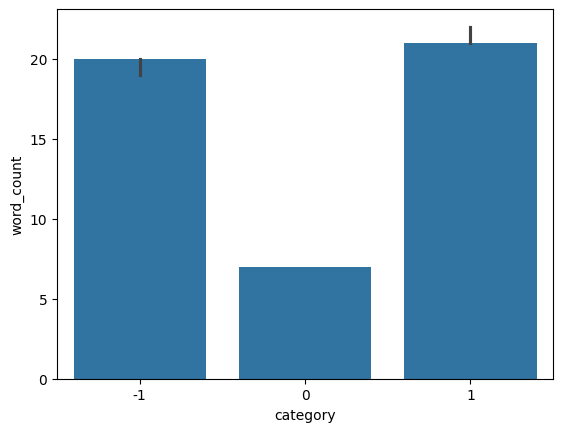

In [ ]:
from numpy._core.fromnumeric import mean
sns.barplot(data=df,x='category',y='word_count',estimator='median')

In [ ]:
!pip install nltk

In [ ]:
from  nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#define the  list of english stopwords
stop_words=set(stopwords.words('english'))

#create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words']=df['clean_comment'].apply(lambda x:len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
28646,yeddy says aristrike will help bjp win more th...,1,24,7
18055,reading the comment gives notions anti nationa...,0,8,1
203,only needs one touch,0,4,1
24593,anyone cares was not huge fan the first season...,1,44,14
33352,tmc state party,0,3,0


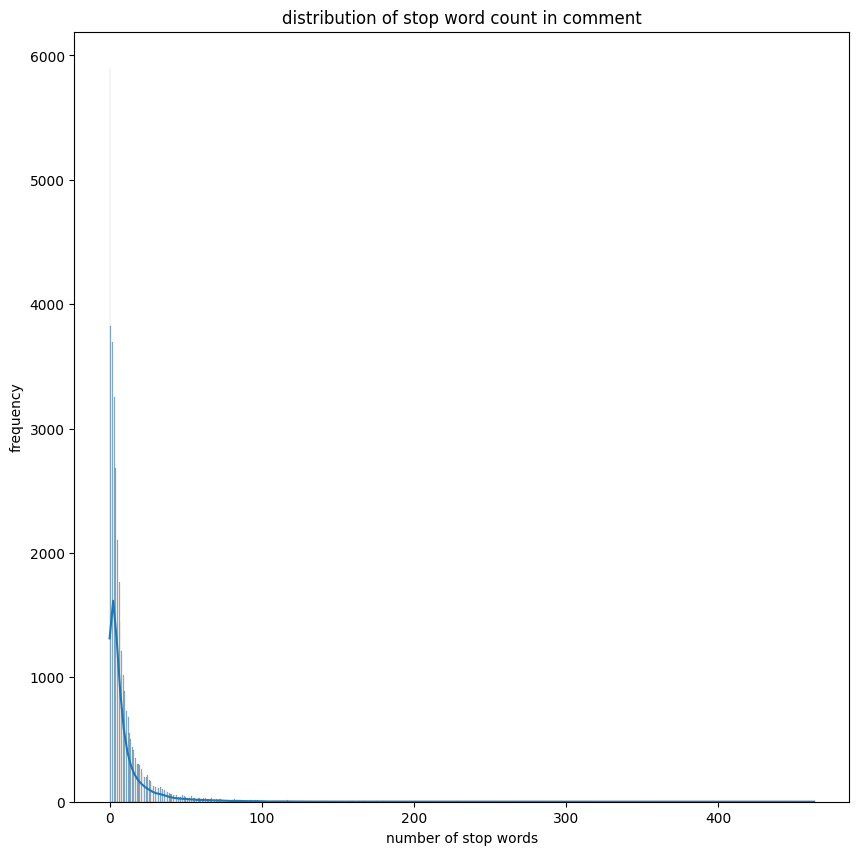

In [ ]:
#create a distribution plot(displot) for the 'num_stop_words' column
plt.figure(figsize=(10,10))
sns.histplot(df['num_stop_words'],kde=True)
plt.title('distribution of stop word count in comment')
plt.xlabel('number of stop words')
plt.ylabel('frequency')
plt.show()

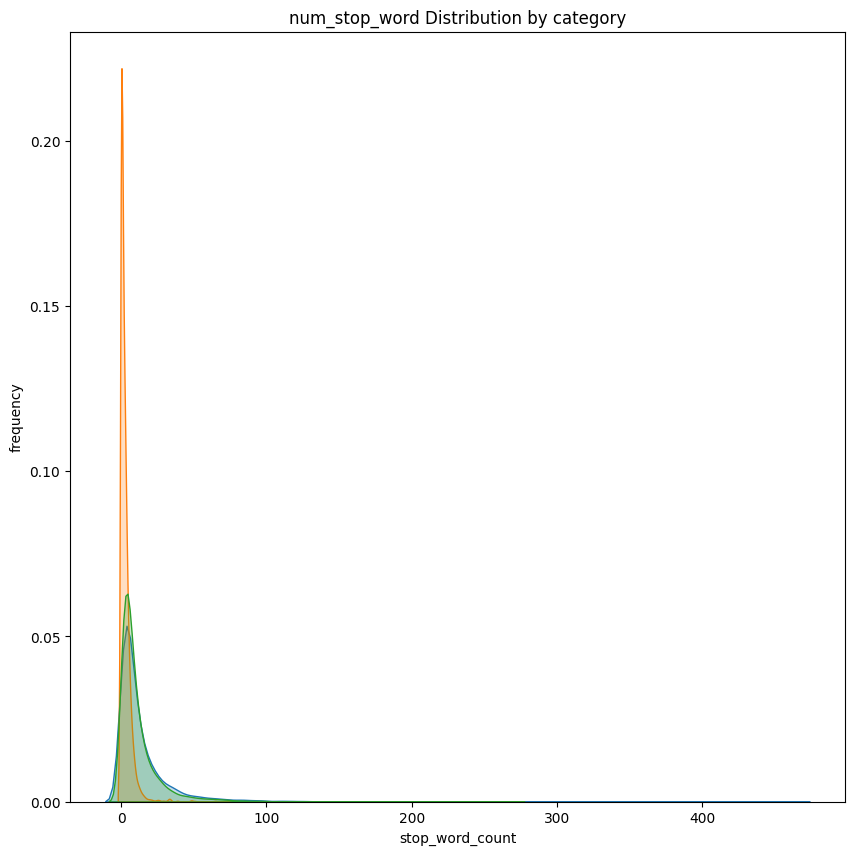

In [ ]:
plt.figure(figsize=(10,10))
sns.kdeplot(df[df['category']==1]['num_stop_words'], label='positive',fill=True)
sns.kdeplot(df[df['category']==0]['num_stop_words'], label='Neutral',fill=True)
sns.kdeplot(df[df['category']==-1]['num_stop_words'], label='Negative',fill=True)
plt.title('num_stop_word Distribution by category')
plt.xlabel('stop_word_count')
plt.ylabel('frequency')
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

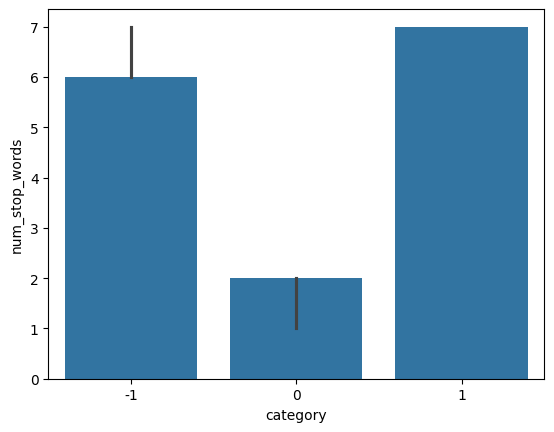

In [ ]:
# median word count amoung sentiments

sns.barplot(df,x='category',y='num_stop_words', estimator='median')

/tmp/ipython-input-2278640446.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


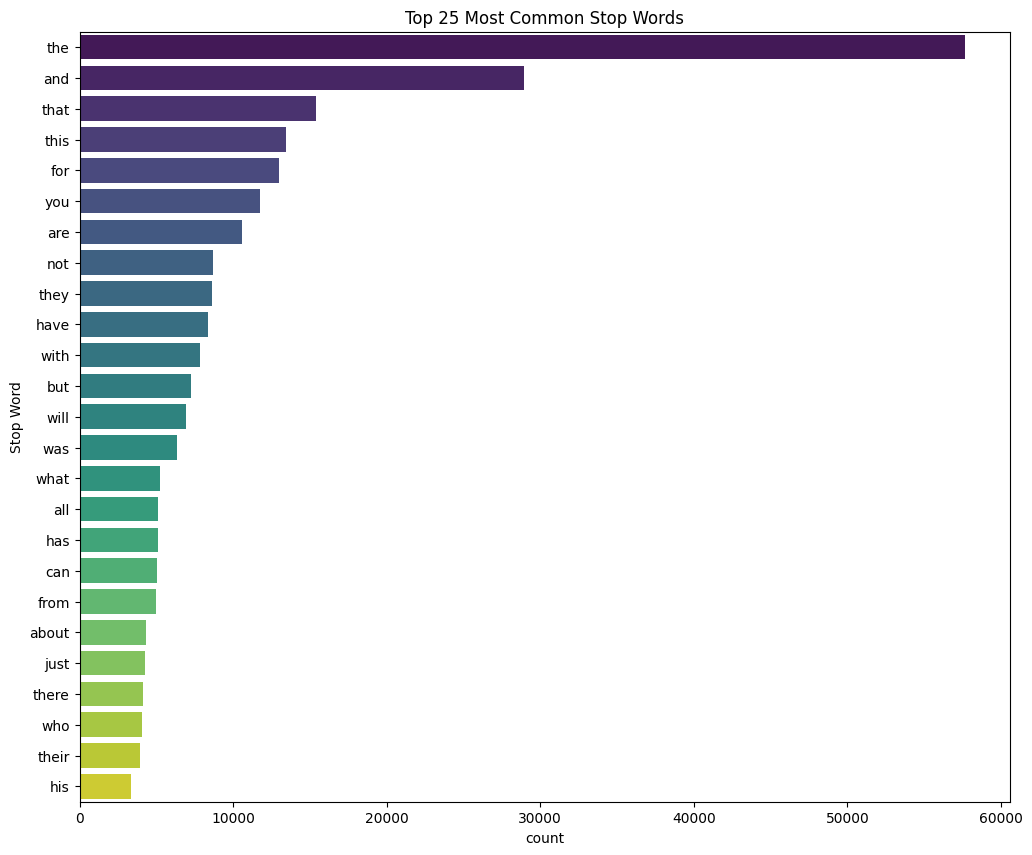

In [ ]:
#create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

#extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words=[word for comment in df['clean_comment']for word in comment.split() if word in stop_words]

#count the most common stop words
most_common_stop_words=Counter(all_stop_words).most_common(25)

#convert the most common stop words to a dataframe for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

#create the barplot for the top 25 most common stop words
plt.figure(figsize=(12,10))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('count')
plt.ylabel('Stop Word')
plt.show()

In [ ]:
df['num_chars'] = df['clean_comment'].apply(lambda x: len(x))
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [ ]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [ ]:
from collections import Counter

#combine all comment into one large string
all_comments = ' '.join(df['clean_comment'])

#count the frequency of each character
char_frequency = Counter(all_comments)

#convert the character frequency into a dataframe for better display
char_frequency_df = pd.DataFrame(list(char_frequency.items()), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [ ]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [ ]:
char_frequency_df.tail(50)

,character,frequency
1286,货,1
1287,语,1
1312,耐,1
1313,精,1
342,━,1
345,⊂,1
346,゜,1
347,ｊ,1
1289,显,1
1291,鞋,1


In [ ]:
#create a new column 'num_punctuation_chars' to count punctuation character ine each comment
df['num_punctuation_chars']=df['clean_comment'].apply(lambda x:sum([1 for char in x if char in '.,!,?,;:"\",(),{},[]@']))
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
23781,all aspiring music producer who mainly does hi...,1,99,35,601,0
16544,what would give for that hairstyle game,-1,7,3,39,0
18470,unemployment and moral policing the real devil...,1,14,5,90,0
21423,that final shot also mirrors one from the begi...,0,15,5,84,0
18630,this shouldn surprise anyone considering how i...,0,14,4,103,0


In [ ]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.000000
mean,0.009948
std,0.718061
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,136.000000


/tmp/ipython-input-3818625914.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigram_df, x='count', y='bigram', palette='magma')


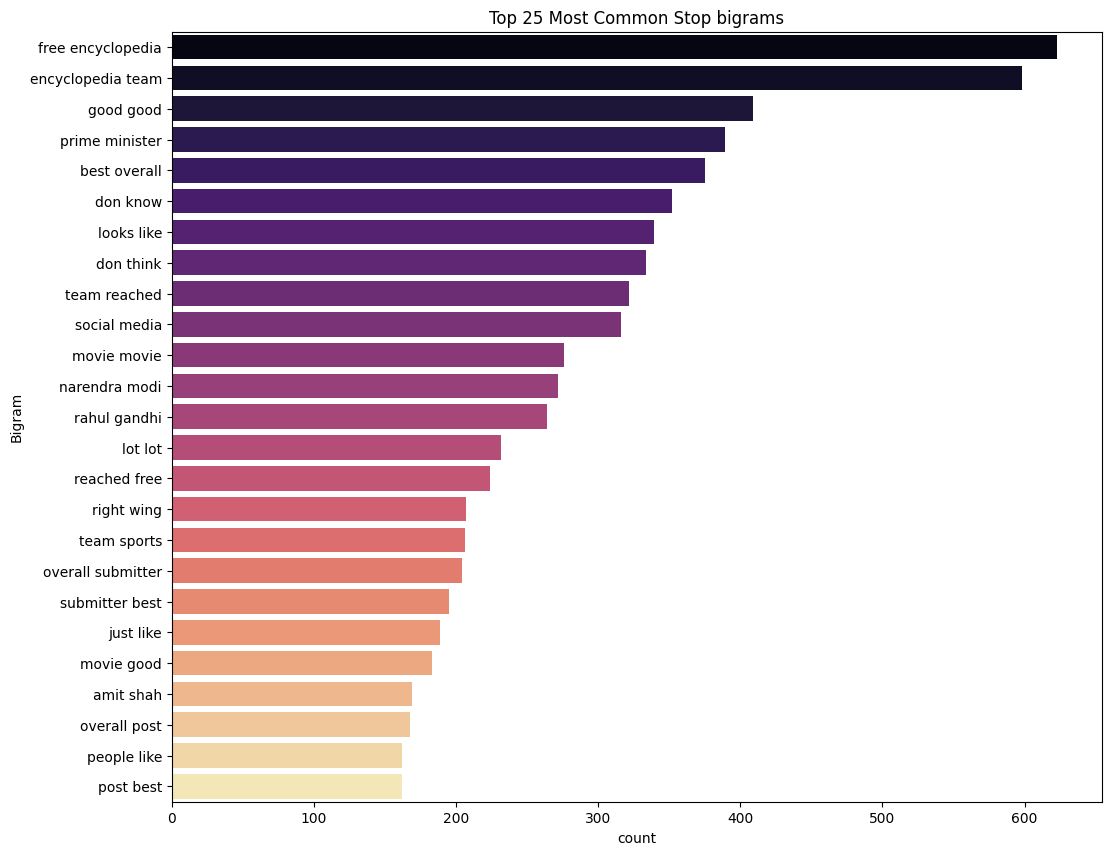

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#create a funstionto extract the top 25 bigrams
def get_top_bigrams(corpus, n=None):
  vec=CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
  bag_words=vec.transform(corpus)
  sum_words=bag_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  word_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
  return word_freq[:n]

#get top 25 bigram
top_25_bigram = get_top_bigrams(df['clean_comment'],25)

# convert the bigram into a Dataframe for plotting
top_25_bigram_df=pd.DataFrame(top_25_bigram,columns=['bigram','count'])

plt.figure(figsize=(12,10))
sns.barplot(data=top_25_bigram_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Stop bigrams')
plt.xlabel('count')
plt.ylabel('Bigram')
plt.show()


/tmp/ipython-input-1903613287.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigram_df, x='count', y='trigram', palette='coolwarm')


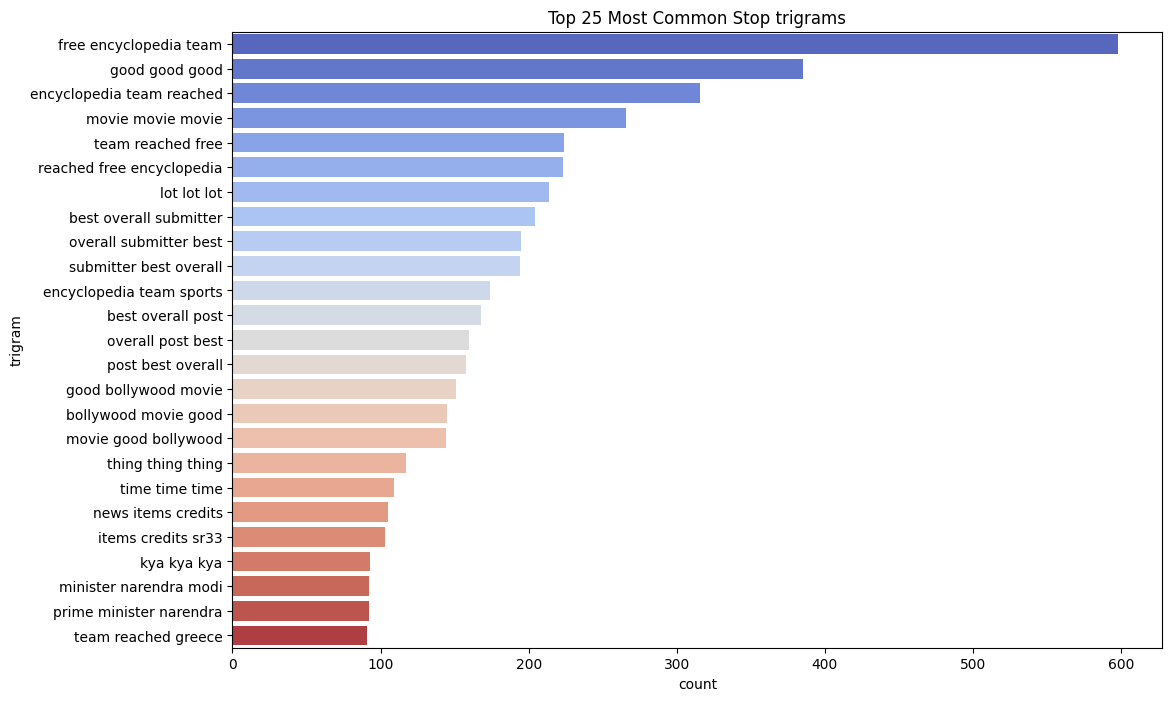

In [ ]:
#create a function to extract the top 25 bigrams
def get_top_trigrams(corpus, n=None):
  vec=CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
  bag_words=vec.transform(corpus)
  sum_words=bag_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  word_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
  return word_freq[:n]

#get top 25 bigram
top_25_trigram = get_top_trigrams(df['clean_comment'],25)

# convert the bigram into a Dataframe for plotting
top_25_trigram_df=pd.DataFrame(top_25_trigram,columns=['trigram','count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_trigram_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Stop trigrams')
plt.xlabel('count')
plt.ylabel('trigram')
plt.show()


In [ ]:
# remove non-english characters form the "clean_comment" column
#keeping only standard english letter, digits, and common punctuation
import re

df['clean_comment']=df['clean_comment'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s!?.,]','',str(x)))


In [ ]:
all_text=' '.join(df['clean_comment'])

#count the frequency of each character
char_frequency=Counter(all_text)

#convert the character frequency into a dataframe for better display
char_frequency_df=pd.DataFrame(list(char_frequency.items()),columns=['character','frequency']).sort_values(by='frequency',ascending=False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [ ]:
from nltk.corpus import stopwords

#deining stop words but keeping essential ones for sentiment analysis
stop_words=set(stopwords.words('english')) - {'not','but','however','no','yet'}


# remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment']=df['clean_comment'].apply(lambda x:' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

#define the lemmatizer
lemmatizer=WordNetLemmatizer()

#Apply lemmatization to the 'clean_comment_no_stopword' column
df['clean_comment']=df['clean_comment'].apply(lambda x:' '.join([lemmatizer.lemmatize(word)for word in x.split()]))

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


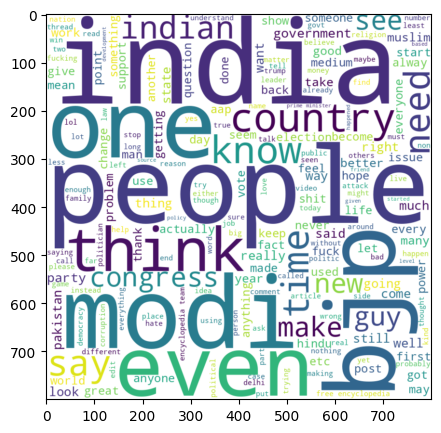

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#create the wordcloud object
def plot_word_cloud(text):
  wordcloud=WordCloud(width=800,height=800,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis=("off")
  plt.show()

plot_word_cloud(df['clean_comment'])



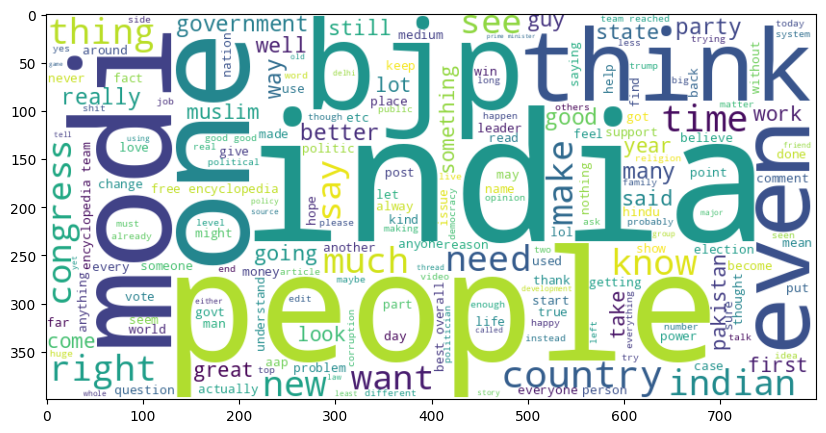

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#create the wordcloud object
def plot_word_cloud(text):
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis=("off")
  plt.show()

plot_word_cloud(df[df['category']==1]['clean_comment'])




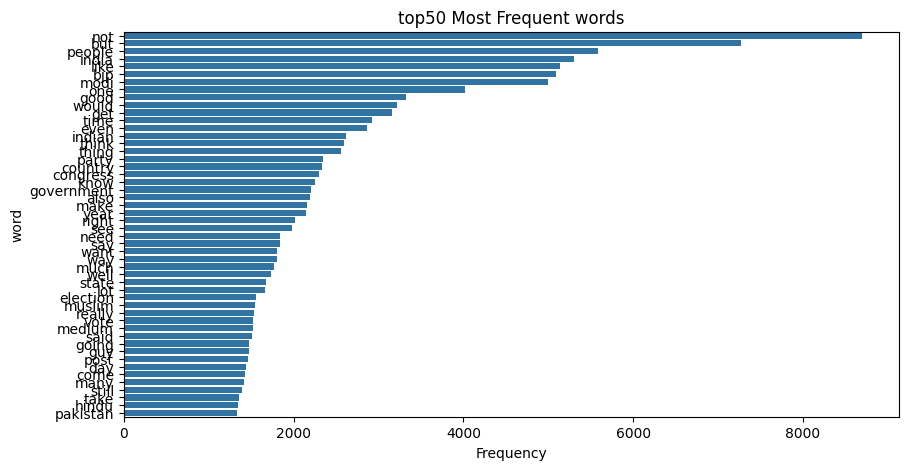

In [ ]:
def plot_top_n_words(df, n=20):
  """plot the top N most frequently word in the datasets"""
  #flatten all the word in the content column
  word=' '.join(df['clean_comment']).split()

  #get the top N most common words
  counter=Counter(word)
  most_common=counter.most_common(n)

  #split the words and their counts for plotting
  words,counts=zip(*most_common)

  #plot the top N words
  plt.figure(figsize=(10,5))
  sns.barplot(x=list(counts),y=list(words))
  plt.title(f'top{n} Most Frequent words')
  plt.xlabel('Frequency')
  plt.ylabel('word')
  plt.show()

plot_top_n_words(df, n=50)


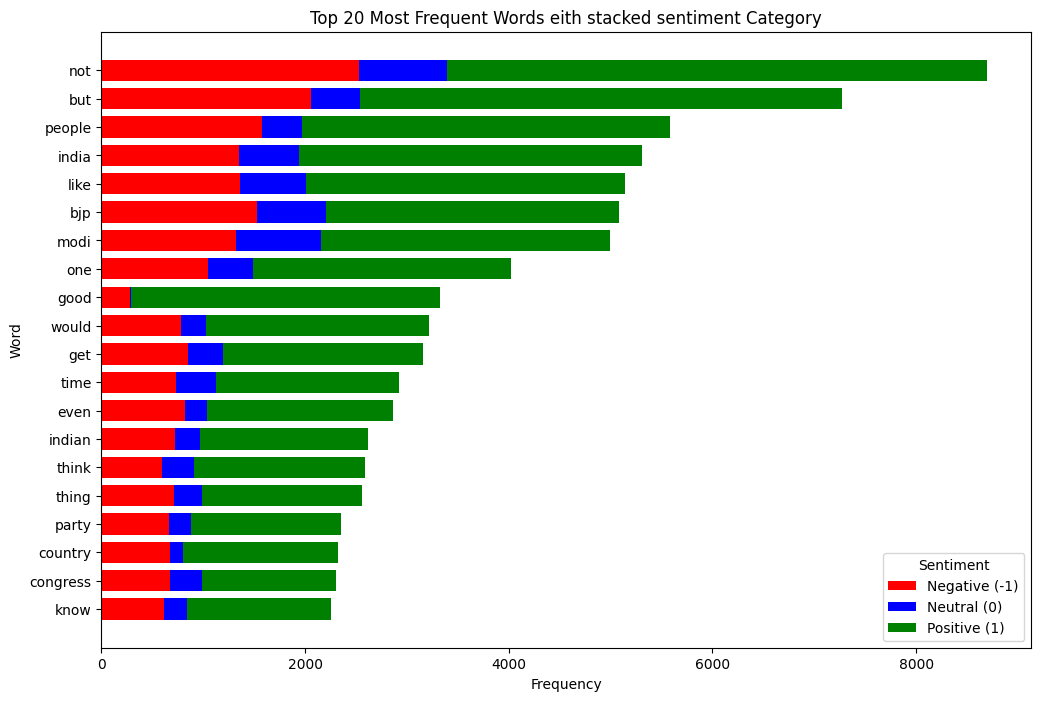

In [ ]:
def plot_top_n_words_by_category(df, n=20, start=0):
  """plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
  #
  word_category_counts={}
  for idx, row in df.iterrows():
      word_list=row['clean_comment'].split()
      category = row['category']
      for word in word_list:
          if word not in word_category_counts:
            word_category_counts[word]={-1:0,0:0,1:0}

      #increment the count for the corresponding sentiment analysis
          word_category_counts[word][category] += 1

 #get total counts across all categories for each word
  total_word_counts={word: sum(counts.values()) for word, counts in word_category_counts.items()}

  #get the top N most frequent words acreoss all categories
  most_common_stop_words=sorted(total_word_counts.items(),key=lambda x:x[1],reverse=True)[start:start+n]
  top_words=[word for word, _ in most_common_stop_words]

  #prepare data for the plotting
  word_labels = top_words
  Negative_counts = [word_category_counts[word][-1] for word in top_words]
  Neutral_counts = [word_category_counts[word][0] for word in top_words]
  positive_counts = [word_category_counts[word][1] for word in top_words]

  #plot the stacked bar chart
  plt.figure(figsize=(12,8))
  bar_thickness = 0.75 # Renamed for clarity with barh

  #plot negative,positive,negative counts in stacked number
  plt.barh(word_labels, Negative_counts, color='red', label='Negative (-1)', height=bar_thickness)
  plt.barh(word_labels, Neutral_counts, left=Negative_counts, color='blue', label='Neutral (0)',height=bar_thickness)
  plt.barh(word_labels, positive_counts, left=[x+y for x,y in zip(Negative_counts,Neutral_counts)], color='green', label='Positive (1)',height=bar_thickness)

  plt.xlabel('Frequency')
  plt.ylabel('Word')
  plt.title(f'Top {n} Most Frequent Words eith stacked sentiment Category')
  plt.legend(title='Sentiment',loc='lower right')
  plt.gca().invert_yaxis() # invert y-axis to show the height frequnecy at the top
  plt.show()

plot_top_n_words_by_category(df, n=20)